In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


2021-09-21 21:00:08.541149: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-21 21:00:08.541255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cifar = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()
print(X_train.shape, X_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
# validation set
X_train, X_valid = X_train[5000:]/255, X_train[:5000]/255
y_train, y_valid = y_train[5000:], y_train[:5000]


frog


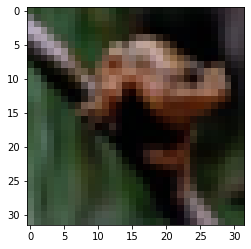

horse


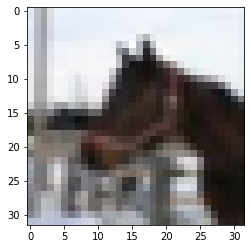

truck


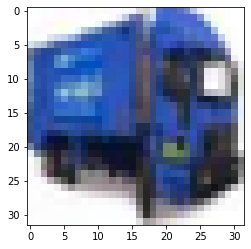

plane


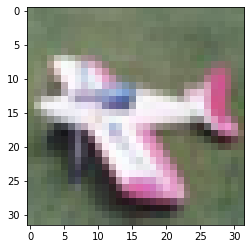

dog


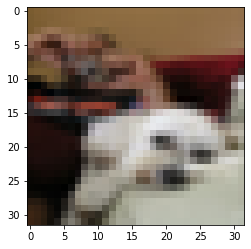

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
for i in range(5) :
    print(classes[y_train[i][0]])
    plt.imshow(X_train[i])
    plt.show()
    

In [5]:
# model
model = keras.models.Sequential()
# input shape --> 32*32*3
model.add(keras.layers.Conv2D(16, 3, activation = 'relu', padding = 'same'
                             , input_shape = [32, 32, 3]))
# shape --> 32*32*16
model.add(keras.layers.MaxPool2D(2))
# shape --> 16*16*16
model.add(keras.layers.Conv2D(32, 3, activation = 'relu', padding = 'same'))
# shape --> 16*16*32
model.add(keras.layers.MaxPool2D(2))
#shape --> 8*8*32
model.add(keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
#shape --> 8*8*64
model.add(keras.layers.MaxPool2D(2))
#shape --> 4*4*64
## flatten and FC layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()          


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

2021-09-21 21:00:23.238694: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-21 21:00:23.241781: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-21 21:00:23.241819: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-21 21:00:23.241846: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6772edc26500): /proc/driver/nvidia/version does not exist
2021-09-21 21:00:23.242194: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other o

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32,
                   validation_data = (X_valid, y_valid))

2021-09-21 21:00:25.115384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-21 21:00:25.127576: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999995000 Hz


Epoch 1/30
1407/1407 [==============================] - 32s 23ms/step - loss: 2.2139 - accuracy: 0.1688 - val_loss: 1.8691 - val_accuracy: 0.3418
Epoch 2/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.7890 - accuracy: 0.3547 - val_loss: 1.6605 - val_accuracy: 0.4110
Epoch 3/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.6036 - accuracy: 0.4202 - val_loss: 1.4425 - val_accuracy: 0.4904
Epoch 4/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.4953 - accuracy: 0.4609 - val_loss: 1.4293 - val_accuracy: 0.4814
Epoch 5/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.4076 - accuracy: 0.4981 - val_loss: 1.3051 - val_accuracy: 0.5346
Epoch 6/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.3480 - accuracy: 0.5177 - val_loss: 1.2670 - val_accuracy: 0.5482
Epoch 7/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.3068 - accuracy: 0.5324 - val_loss: 1.2622 -

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


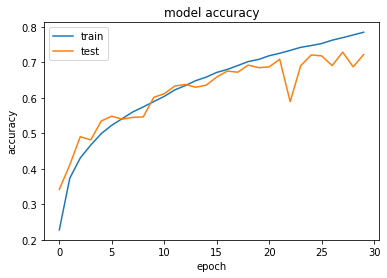

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

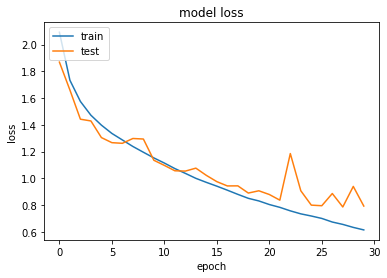

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
X_test = X_test / 255 
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8157 - accuracy: 0.7237


[0.8156925439834595, 0.7236999869346619]

In [12]:
model.save('C://Users//ehabi//anaconda3//envs//Tensorflow And Keras//CIFAR10-Classifier.h5')